In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
voters = pd.read_excel('data/voters.xlsx')
preferences = pd.read_excel('data/preferences.xlsx')
polling_stations = pd.read_excel('data/polling_stations.xlsx')

In [ ]:
voters.head()

In [43]:
preferences.head(50)

,Unnamed: 0,voter,polling_station,preference_priority
0,0,voter_1,polling_station_168,1
1,1,voter_1,polling_station_207,2
2,2,voter_1,polling_station_222,3
3,3,voter_1,polling_station_124,4
4,4,voter_1,polling_station_223,5
5,5,voter_1,polling_station_297,6
6,6,voter_1,polling_station_129,7
7,7,voter_1,polling_station_12,8
8,8,voter_1,polling_station_1,9
9,9,voter_1,polling_station_129,10


In [27]:
polling_stations.tail()

,Unnamed: 0,polling_station,voting_booth,station_cost
395,395,polling_station_396,5,212
396,396,polling_station_397,12,68
397,397,polling_station_398,14,102
398,398,polling_station_399,16,284
399,399,polling_station_400,14,145


In [26]:
polling_stations.describe()

,Unnamed: 0,voting_booth,station_cost
count,400.000000,400.000000,400.000000
mean,199.500000,11.542500,177.645000
std,115.614301,4.387633,73.159379
min,0.000000,5.000000,50.000000
25%,99.750000,8.000000,116.750000
50%,199.500000,11.000000,183.000000
75%,299.250000,15.000000,238.250000
max,399.000000,19.000000,299.000000


STRATEGY: RANDOM ALLOCATION

In [32]:
class RandomVoterAllocator:
    def __init__(self, voters, polling_stations):
        self.voters = voters
        self.polling_stations = polling_stations
    
    def random_allocation(self):
        # Converti la colonna 'polling_station' in un array NumPy
        polling_stations_array = self.polling_stations['polling_station'].values
        
        # Converti la colonna 'voter' in un array NumPy
        voters_array = self.voters['voter'].values
        np.random.shuffle(voters_array)
   
        allocation = {}

        for voter in voters_array:
            station = np.random.choice(polling_stations_array)
            if station in allocation:
                allocation[station].append(voter)
            else:
                allocation[station] = [voter]
        return allocation

# Esempio di utilizzo
#voters_df =  pd.read_excel('data/voters.xlsx')
#polling_stations_df = pd.read_excel('data/preferences.xlsx')

TheRandomAllocator = RandomVoterAllocator(voters, polling_stations)
random_allocation_result = TheRandomAllocator.random_allocation()
print(random_allocation_result)


{'polling_station_183': ['voter_735', 'voter_948', 'voter_995', 'voter_256', 'voter_2285', 'voter_1415', 'voter_1783', 'voter_853'], 'polling_station_214': ['voter_825', 'voter_3932', 'voter_3757', 'voter_859', 'voter_3157', 'voter_3017', 'voter_569', 'voter_2351', 'voter_2242', 'voter_2697', 'voter_1229', 'voter_2220', 'voter_2621', 'voter_972', 'voter_637'], 'polling_station_290': ['voter_2023', 'voter_3373', 'voter_614', 'voter_366', 'voter_2340', 'voter_1073', 'voter_1962', 'voter_570', 'voter_3784', 'voter_1369', 'voter_383', 'voter_2141'], 'polling_station_326': ['voter_3663', 'voter_1573', 'voter_3837', 'voter_3733', 'voter_420', 'voter_2726', 'voter_3086', 'voter_88', 'voter_410', 'voter_548', 'voter_2787', 'voter_3498', 'voter_1990'], 'polling_station_161': ['voter_1430', 'voter_503', 'voter_1062', 'voter_1303', 'voter_2297', 'voter_401', 'voter_613', 'voter_798', 'voter_1353', 'voter_3186', 'voter_1609', 'voter_2751', 'voter_2424', 'voter_1941', 'voter_187'], 'polling_station

In [33]:
# a dataframe is built to better check the results
allocation_df = pd.DataFrame(list(random_allocation_result.items()), columns=['Station', 'Voters'])
allocation_df

,Station,Voters
0,polling_station_183,"[voter_735, voter_948, voter_995, voter_256, v..."
1,polling_station_214,"[voter_825, voter_3932, voter_3757, voter_859,..."
2,polling_station_290,"[voter_2023, voter_3373, voter_614, voter_366,..."
3,polling_station_326,"[voter_3663, voter_1573, voter_3837, voter_373..."
4,polling_station_161,"[voter_1430, voter_503, voter_1062, voter_1303..."
...,...,...
395,polling_station_316,"[voter_2865, voter_2178, voter_2134, voter_66,..."
396,polling_station_382,"[voter_1442, voter_1513, voter_663, voter_2634..."
397,polling_station_208,"[voter_2963, voter_3015, voter_1101, voter_145..."
398,polling_station_111,"[voter_3567, voter_1110, voter_103, voter_830,..."


In [ ]:
stations_extraction = list(random_allocation_result.keys())
num_voters_extraction = [len(voters) for voters in random_allocation_result.values()]

# creating a bar graph
plt.bar(stations_extraction, num_voters_extraction)
plt.xlabel('Stations')
plt.ylabel('Number of voters assigned')
plt.title('Random allocation of voters to stations')
plt.xticks(rotation=45)
plt.show()

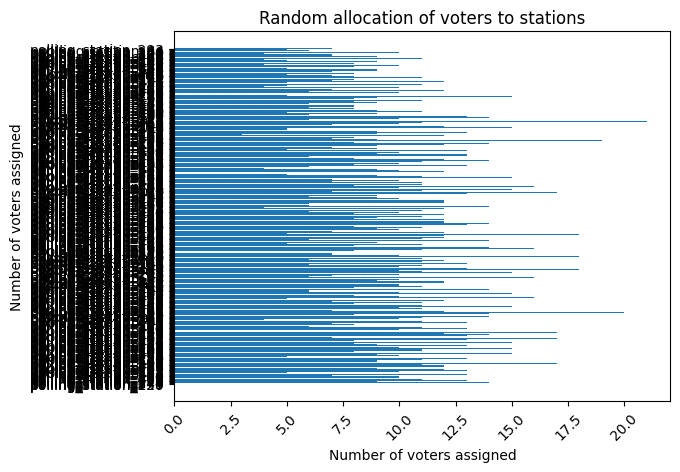

In [30]:
stations_extraction = list(random_allocation_result.keys())
num_voters_extraction = [len(voters) for voters in random_allocation_result.values()]

plt.barh(stations_extraction, num_voters_extraction)
plt.xlabel('Number of voters assigned')
plt.ylabel('Number of voters assigned')
plt.title('Random allocation of voters to stations')
plt.xticks(rotation=45)
plt.show()

STRATEGY: ALLOCATION BASED ON PREFERENCES

In [103]:
polling_stations.head()

,Unnamed: 0,polling_station,voting_booth,station_cost
0,0,polling_station_1,13,273
1,1,polling_station_2,18,92
2,2,polling_station_3,12,141
3,3,polling_station_4,18,157
4,4,polling_station_5,7,298


In [110]:
class PreferenceVoterAllocator:
    def __init__(self, voters, preferences, polling_stations):
        self.voters = voters
        self.preferences = preferences
        self.polling_stations = polling_stations
        self.allocation_result = None
        self.station_capacity = None 

    def initialise_station_capacity(self):
        self.station_capacity = {}
        for _, row in self.polling_stations.iterrows():
            self.station_capacity[row['polling_station']] = row['voting_booth']

    def preference_based_allocation(self):
        allocation = {}
        sorted_preferences = self.preferences.sort_values(by=['voter','preference_priority'])

        for _, row in sorted_preferences.iterrows():
            voter = row['voter']
            station = row['polling_station']

            if self.station_capacity[station] > 0:
                if voter in allocation:
                    allocation[voter].append(station)
                else:
                    allocation[voter] = [station]
                self.station_capacity[station] -= 1

        self.allocation_result = allocation

    def print_allocation_result(self):
        if self.allocation_result:
            print(self.allocation_result)
        else:
            print("Run allocation first.")

preference_voter_allocator = PreferenceVoterAllocator(voters, preferences, polling_stations)
preference_voter_allocator.initialise_station_capacity()
preference_voter_allocator.preference_based_allocation()

preference_voter_allocator.print_allocation_result()

{'voter_1': ['polling_station_168', 'polling_station_207', 'polling_station_222', 'polling_station_124', 'polling_station_223', 'polling_station_297', 'polling_station_129', 'polling_station_12', 'polling_station_1', 'polling_station_129', 'polling_station_46', 'polling_station_343', 'polling_station_338', 'polling_station_90', 'polling_station_269', 'polling_station_237', 'polling_station_22', 'polling_station_97'], 'voter_10': ['polling_station_60', 'polling_station_317', 'polling_station_95', 'polling_station_22', 'polling_station_319', 'polling_station_279', 'polling_station_275', 'polling_station_185', 'polling_station_370', 'polling_station_95', 'polling_station_292', 'polling_station_294', 'polling_station_391', 'polling_station_350', 'polling_station_260', 'polling_station_265', 'polling_station_344', 'polling_station_343', 'polling_station_292', 'polling_station_316', 'polling_station_123', 'polling_station_262', 'polling_station_58', 'polling_station_241', 'polling_station_68

In [112]:
print(type(preference_voter_allocator.allocation_result))

<class 'dict'>


In [113]:
preference_allocation_result = pd.DataFrame.from_dict(preference_voter_allocator.allocation_result, orient='index')
#preference_allocation_result.head()

In [114]:
print(type(preference_allocation_result))

<class 'pandas.core.frame.DataFrame'>


In [115]:
preference_allocation_result.head(10)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
voter_1,polling_station_168,polling_station_207,polling_station_222,polling_station_124,polling_station_223,polling_station_297,polling_station_129,polling_station_12,polling_station_1,polling_station_129,...,None,None,None,None,None,None,None,None,None,None
voter_10,polling_station_60,polling_station_317,polling_station_95,polling_station_22,polling_station_319,polling_station_279,polling_station_275,polling_station_185,polling_station_370,polling_station_95,...,None,None,None,None,None,None,None,None,None,None
voter_100,polling_station_73,polling_station_154,polling_station_45,polling_station_377,polling_station_141,polling_station_75,polling_station_300,polling_station_44,polling_station_215,polling_station_20,...,None,None,None,None,None,None,None,None,None,None
voter_1000,polling_station_396,polling_station_7,polling_station_391,polling_station_351,polling_station_102,polling_station_147,polling_station_184,polling_station_224,polling_station_46,polling_station_106,...,polling_station_32,polling_station_68,polling_station_333,polling_station_155,polling_station_306,polling_station_103,polling_station_232,polling_station_207,polling_station_55,polling_station_143
voter_1001,polling_station_109,polling_station_52,polling_station_33,polling_station_204,polling_station_249,polling_station_198,polling_station_208,polling_station_306,polling_station_18,polling_station_97,...,polling_station_25,polling_station_126,polling_station_272,polling_station_140,None,None,None,None,None,None
voter_1002,polling_station_88,polling_station_219,polling_station_34,polling_station_141,polling_station_362,polling_station_177,polling_station_91,polling_station_55,polling_station_215,polling_station_199,...,None,None,None,None,None,None,None,None,None,None
voter_1003,polling_station_35,polling_station_87,polling_station_113,polling_station_128,polling_station_58,polling_station_284,polling_station_382,polling_station_32,None,None,...,None,None,None,None,None,None,None,None,None,None
voter_1004,polling_station_9,polling_station_152,polling_station_74,polling_station_30,polling_station_94,polling_station_168,polling_station_201,polling_station_263,polling_station_236,polling_station_339,...,None,None,None,None,None,None,None,None,None,None
voter_1005,polling_station_330,polling_station_243,polling_station_382,polling_station_252,polling_station_74,polling_station_8,polling_station_162,polling_station_340,polling_station_102,polling_station_197,...,None,None,None,None,None,None,None,None,None,None
voter_1006,polling_station_64,polling_station_381,polling_station_287,polling_station_52,polling_station_71,polling_station_352,polling_station_25,polling_station_42,polling_station_11,polling_station_342,...,None,None,None,None,None,None,None,None,None,None


In [120]:
num_rows = preference_allocation_result.shape[0]
print("Number of rows: ", num_rows)

Number of rows:  354


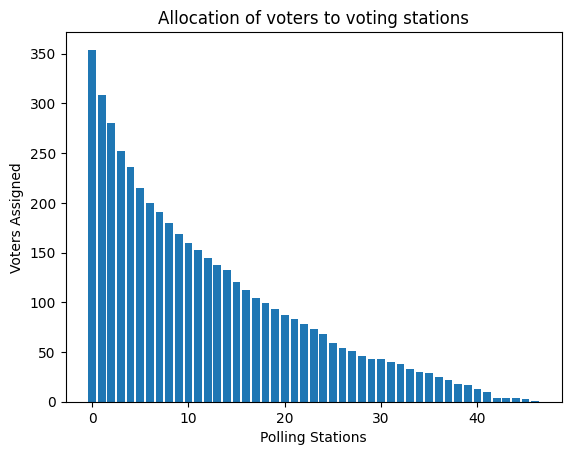

In [117]:
# number of voters assigned to each station
preferences_allocation_counts = preference_allocation_result.count()

plt.bar(preferences_allocation_counts.index, preferences_allocation_counts.values)
plt.xlabel('Polling Stations')
plt.ylabel('Voters Assigned')
plt.title('Allocation of voters to voting stations')
plt.show()

STRATEGY: PRICE BASED ALLOCATION 🏦

In [121]:
def price_based_allocation(voters, stations):
    allocation = {}  # Dizionario per memorizzare l'assegnazione dei votanti ai seggi
    station_capacity = {}  # Dizionario per tracciare la capacità rimanente di ciascun seggio
    
    # Inizializza la capacità dei seggi
    for _, row in stations.iterrows():
        station_capacity[row['stations']] = row['station_rooms']
    
    # Ordina i seggi in base al prezzo (dal più economico al più costoso)
    sorted_stations = stations.sort_values(by='station_price')
    
    # Itera attraverso i votanti e assegnali ai seggi in base al prezzo e alla capacità
    for _, row in voters.iterrows():
        voter = row['voter']
        discount = row['discount']
        
        # Calcola il prezzo massimo che il votante è disposto a pagare
        max_price = 1 - discount
        
        # Trova il primo seggio disponibile con prezzo minore o uguale al prezzo massimo
        for _, station_row in sorted_stations.iterrows():
            station = station_row['stations']
            station_price = station_row['station_price']
            
            if station_price <= max_price and station_capacity[station] > 0:
                # Assegna il votante al seggio
                if voter in allocation:
                    allocation[voter].append(station)
                else:
                    allocation[voter] = [station]
                # Aggiorna la capacità del seggio
                station_capacity[station] -= 1
                break
    
    return allocation

# Esempio di utilizzo della funzione
voters_df = pd.read_csv('Voters.csv')
stations_df = pd.read_csv('Stations.csv')

allocation_result = price_based_allocation(voters_df, stations_df)
print(allocation_result)


FileNotFoundError: [Errno 2] No such file or directory: 'Voters.csv'

In [ ]:
def availability_based_allocation(voters, polling_stations):
    sorted_stations = sorted(polling_stations, key=lambda x: x['capacity'], reverse=True)
    allocation = {}
    for voter in voters:
        for station in sorted_stations:
            if station['id'] not in allocation:
                allocation[station['id']] = []
            if len(allocation[station['id']]) < station['capacity']:
                allocation[station['id']].append(voter)
                break
    return allocation


In [ ]:
# ALTRA VERSIONE

import pandas as pd

def availability_based_allocation(voters, stations):
    allocation = {}  # Dizionario per memorizzare l'assegnazione dei votanti ai seggi
    station_capacity = {}  # Dizionario per tracciare la capacità rimanente di ciascun seggio
    
    # Inizializza la capacità dei seggi
    for _, row in stations.iterrows():
        station_capacity[row['stations']] = row['station_rooms']
    
    # Ordina i seggi in base alla capacità (dal più capiente al meno capiente)
    sorted_stations = stations.sort_values(by='station_rooms', ascending=False)
    
    # Itera attraverso i votanti e assegnali ai seggi in base alla capacità e alla preferenza
    for _, row in voters.iterrows():
        voter = row['voter']
        discount = row['discount']
        
        # Calcola la preferenza massima del votante (inversamente proporzionale alla capacità)
        max_preference = 1 / (station_capacity[row['preferred_station']] + 1) * (1 - discount)
        
        # Trova il primo seggio disponibile con preferenza maggiore o uguale alla preferenza massima
        for _, station_row in sorted_stations.iterrows():
            station = station_row['stations']
            station_preference = 1 / (station_capacity[station] + 1)
            
            if station_preference >= max_preference and station_capacity[station] > 0:
                # Assegna il votante al seggio
                if voter in allocation:
                    allocation[voter].append(station)
                else:
                    allocation[voter] = [station]
                # Aggiorna la capacità del seggio
                station_capacity[station] -= 1
                break
    
    return allocation

# Esempio di utilizzo della funzione
voters_df = pd.read_csv('Voters.csv')
voters_df['preferred_station'] = voters_df.apply(lambda row: row['voter'].split('_')[1], axis=1)  # Estrapola la stazione preferita dal nome del votante
stations_df = pd.read_csv('Stations.csv')

allocation_result = availability_based_allocation(voters_df, stations_df)
print(allocation_result)
